# Benchmarks example

In this notebook we will demonstrate how to load the pre-estimated Pareto set and front for the benchmark problems.

In [1]:
import torch
from botorch.utils.sampling import draw_sobol_samples
from jes.benchmarks.marine import MarineDesign
from jes.benchmarks.pareto import get_pareto

In [2]:
problem = MarineDesign(noise_std=0, negate=True)
bounds = problem.bounds
M = problem.num_objectives
d = problem.dim

In [3]:
n_test = 100
seed = 1234
train_X = draw_sobol_samples(bounds=bounds, n=n_test, q=1, seed=seed).squeeze(1)
train_Y = problem(train_X)

ps, pf = get_pareto("Marine")

## Plot

In [4]:
import matplotlib.pyplot as plt

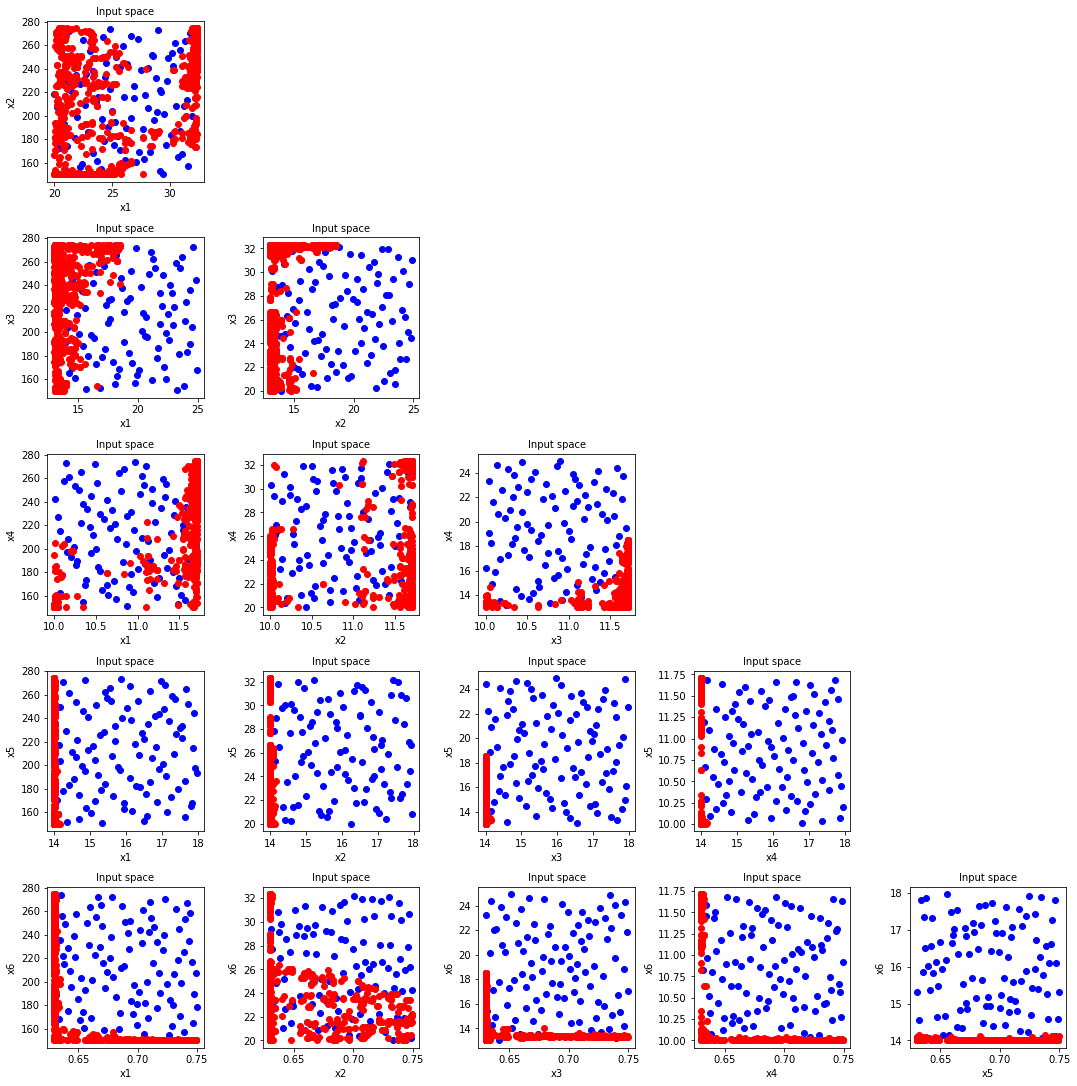

In [5]:
nrow = d
ncol = d

fig, axes = plt.subplots(nrow, ncol, figsize=(3*d, 3*d))

for i, ax in enumerate(axes):
    for j in range(ncol):
        if i > j:
            ax[j].scatter(train_X[:, i], train_X[:, j], color="b")
            ax[j].scatter(ps[:, i], ps[:, j], color="r")
            ax[j].set_title("Input space", fontsize=10)
            ax[j].set_xlabel("x"+str(j+1), fontsize=10)
            ax[j].set_ylabel("x"+str(i+1), fontsize=10)
        else:
            fig.delaxes(axes[i][j])
fig.tight_layout()
plt.show()

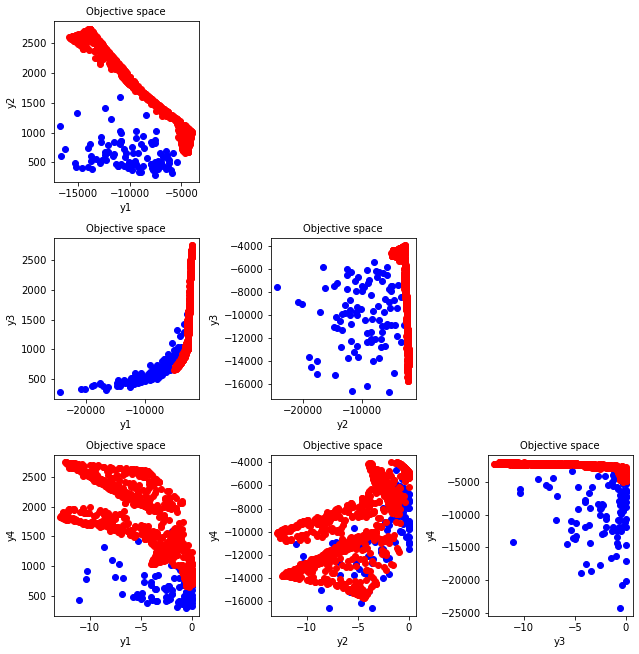

In [6]:
nrow = M
ncol = M

fig, axes = plt.subplots(nrow, ncol, figsize=(3*M, 3*M))

for i, ax in enumerate(axes):
    for j in range(ncol):
        if i > j:
            ax[j].scatter(train_Y[:, i], train_Y[:, j], color="b")
            ax[j].scatter(pf[:, i], pf[:, j], color="r")
            ax[j].set_title("Objective space", fontsize=10)
            ax[j].set_xlabel("y"+str(j+1), fontsize=10)
            ax[j].set_ylabel("y"+str(i+1), fontsize=10)
        else:
            fig.delaxes(axes[i][j])
fig.tight_layout()
plt.show()